<a href="https://colab.research.google.com/github/pallavi-2000/pallavi2000/blob/main/CMT307Lab1Ex2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CMT307 Lab 1, Exercise 2

**This exercise prepares you for using the Colab, data reading and your first data understanding practice.**

The data set is from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#, visit the web page for information about the data.

## Get Data

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
df
print('The shape of the dataset is', df.shape)

The shape of the dataset is (12330, 18)


In [ ]:
# Have a first look at the dataset
print(df.head(5))

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

## Missing Values?
Check if the dataset contains missing values

In [ ]:
# Check for missing values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No missing data which is very helpful!

## Split into input and output pairs
Split the dataset into input (denoted by x) and output (denoted by y) pairs. The output is the target that the machine learning model will be built to predict for.

In [ ]:
print(df['Revenue'].value_counts())

False    10422
True      1908
Name: Revenue, dtype: int64


In [ ]:
# Convert boolean into binary
df['Revenue'] = [1 if  x == True else 0 for x in df['Revenue']]

In [ ]:
# Matches the above value counts
print(df['Revenue'].value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64


In [ ]:
# Split into x, input, and y, output
x = df.drop('Revenue', 1)
y = df.Revenue
y

<ipython-input-9-03e3b4ddcea6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop('Revenue', 1)


0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [ ]:
# Quick look at x
print(x.head(5))

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

## Data Exploration

In [ ]:
# Have a look at the feature types and size of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

       Administrative  Informational  ProductRelated
count    12330.000000   12330.000000    12330.000000
mean         2.315166       0.503569       31.731468
std          3.321784       1.270156       44.475503
min          0.000000       0.000000        0.000000
25%          0.000000       0.000000        7.000000
50%          1.000000       0.000000       18.000000
75%          4.000000       0.000000       38.000000
max         27.000000      24.000000      705.000000


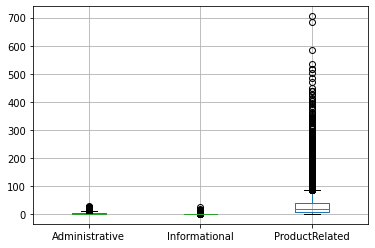

In [ ]:
# Look into the three different webpages that shoppers can visit
print(df[['Administrative', 'Informational', 'ProductRelated']].describe())
df[['Administrative', 'Informational', 'ProductRelated']].boxplot()

The boxplot for ProductRelated is very stretched, shwoing a wide variation in the number of Product Related pages that were visited. Some people were clearly very indecisive about what to purchase.

In [ ]:
# https://github.com/aprilypchen/depy2016/blob/master/DePy_Talk.ipynb
# This is a function that finds the outliers that are outside of 1.5xIQR. 
# It returns what value the outlier has, and where in the dataset they are
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [ ]:
outlier_indices, outlier_values = find_outliers_tukey(df['Administrative'])
print(len(np.sort(outlier_values)))

404


In [ ]:
outlier_indices, outlier_values = find_outliers_tukey(df['Informational'])
print(len(np.sort(outlier_values)))

2631


In [ ]:
outlier_indices, outlier_values = find_outliers_tukey(df['ProductRelated'])
print(len(np.sort(outlier_values)))

987


Surprisingly, there are more outliers for Informational, than ProductRelated. But that is because the upper quartile for Informational is 0, so basically any Informational value not equal to zero is an outlier. Because of the great numbers of Tukey outliers, this exwecise is not going to remove them as they that would remove too much of the data, thus lowering the reliability of the model. 

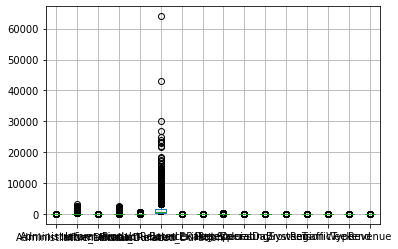

In [ ]:
df.boxplot()

The massive boxplot is ProductRelated_Duration, where people are seen to be browsing for up to almost 17 hours. Again, this doesn't seem right but this will have a negligable effect on the model.

       Administrative_Duration  Informational_Duration  \
count             12330.000000            12330.000000   
mean                 80.818611               34.472398   
std                 176.779107              140.749294   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   7.500000                0.000000   
75%                  93.256250                0.000000   
max                3398.750000             2549.375000   

       ProductRelated_Duration  
count             12330.000000  
mean               1194.746220  
std                1913.669288  
min                   0.000000  
25%                 184.137500  
50%                 598.936905  
75%                1464.157214  
max               63973.522230  


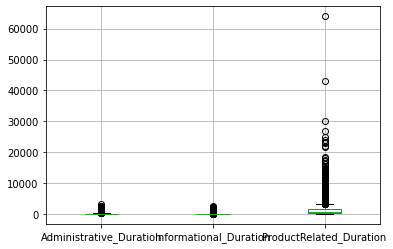

In [ ]:
# Boxplot of durations spent on different webpages.
print(df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].describe())
df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].boxplot()

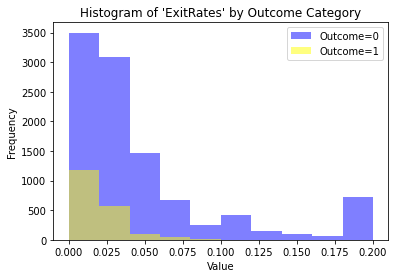

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

In [ ]:
# https://github.com/aprilypchen/depy2016/blob/master/DePy_Talk.ipynb
# These histograms layer the outcomes of when revenue was and wasn't made. 
# Exit rate is the number of exits/number of pageviews for a particular page
import matplotlib.pyplot as plt
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0', color = 'blue')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1', color = 'yellow')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()
plot_histogram_dv(df['ExitRates'], y)
df['ExitRates'].describe()

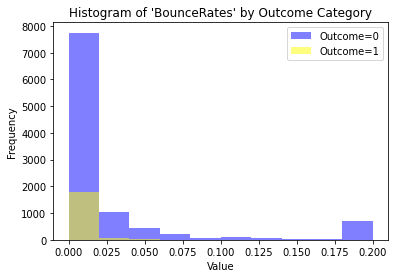

In [ ]:
# Bounce rate is the total number of one page visits/ total number of visits
df['BounceRates'].describe()
plot_histogram_dv(df['BounceRates'], y)


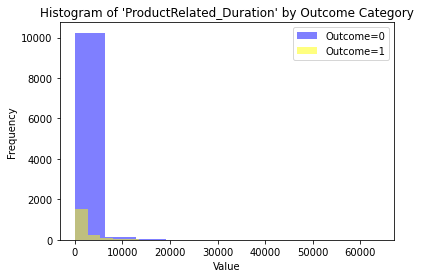

In [ ]:
df['ProductRelated_Duration'].describe()
plot_histogram_dv(df['ProductRelated_Duration'], y)


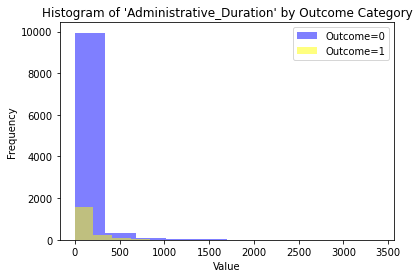

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

In [ ]:
plot_histogram_dv(df['Administrative_Duration'], y)
(df['Administrative_Duration']).describe()

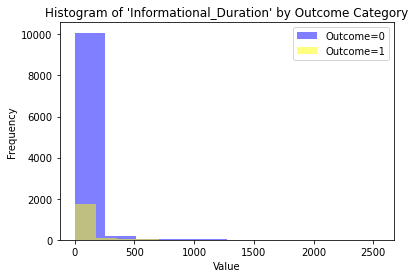

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

In [ ]:
plot_histogram_dv(df['Informational_Duration'], y)
df['Informational_Duration'].describe()

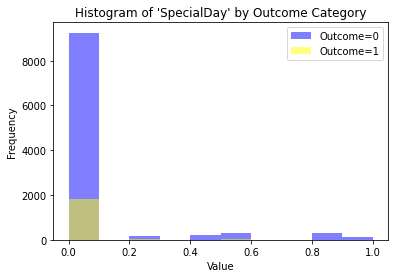

In [ ]:
plot_histogram_dv(df['SpecialDay'], y)

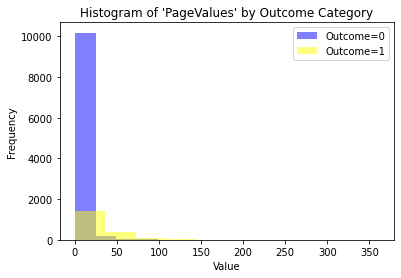

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

In [ ]:
plot_histogram_dv(df['PageValues'], y)
df['PageValues'].describe()

Interestingly, as the average page value increases, the likelihood of revenue being made actually outweighs the likelihood of revenue not being made. This may be explained by the page value increasing as a customer maybe reaches the payment page on the website, where they are most likely to continue and end up purchasing an item. 

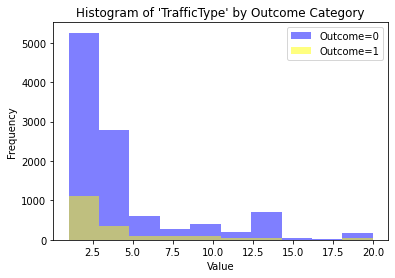

In [ ]:
plot_histogram_dv(df['TrafficType'], y)

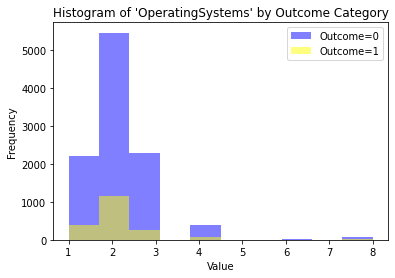

In [ ]:
plot_histogram_dv(df['OperatingSystems'], y)
# This is not exponential due to it being a categorical variable.

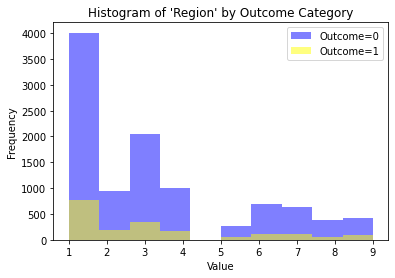

In [ ]:
plot_histogram_dv(df['Region'], y)

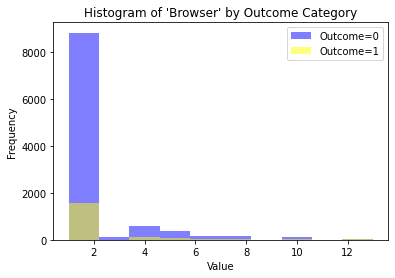

In [ ]:
plot_histogram_dv(df['Browser'], y)

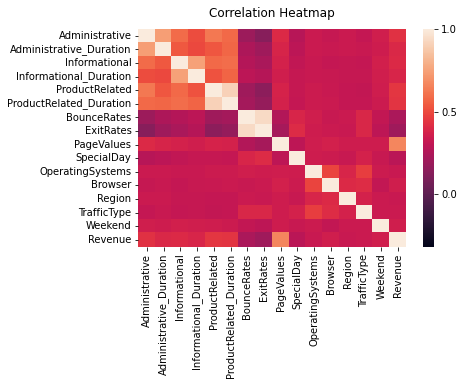

In [ ]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# The heatmap below gives a correlation of each feature against every other feature. 
# For categorical varibales it doesn't make much sense though.
import seaborn as sns
sns.heatmap(df.corr());
sns.set(font_scale=2)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cbar = False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

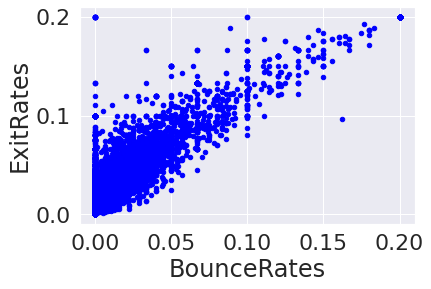

In [ ]:
df.plot(kind='scatter', x='BounceRates', y='ExitRates', color = 'blue')

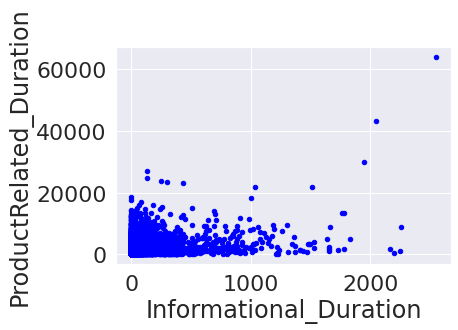

In [ ]:
df.plot(kind='scatter', x='Informational_Duration', y='ProductRelated_Duration', color = 'blue')

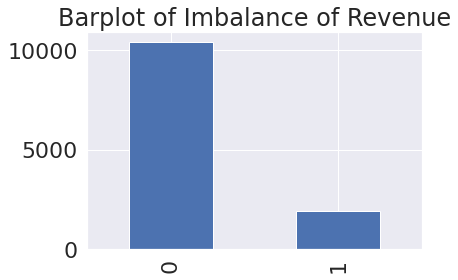

In [ ]:
# Barplot showing data imbalance of Revenue feature
df['Revenue'].value_counts().plot(kind='bar', title= 'Barplot of Imbalance of Revenue')

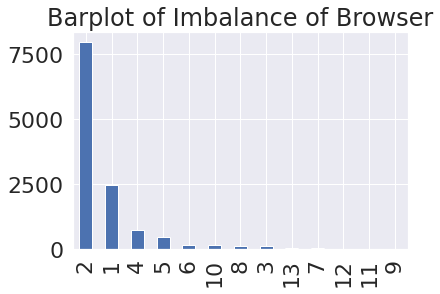

In [ ]:
df['Browser'].value_counts().plot(kind='bar', title= 'Barplot of Imbalance of Browser')

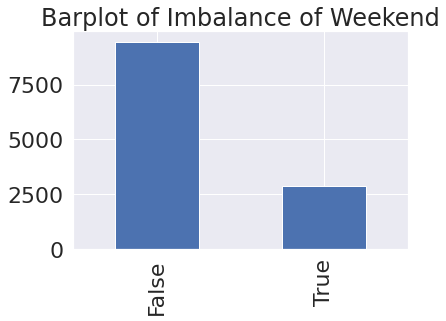

In [ ]:
# Obviously weekend only makes up 2 out of 7 days a week
df['Weekend'].value_counts().plot(kind='bar', title= 'Barplot of Imbalance of Weekend')

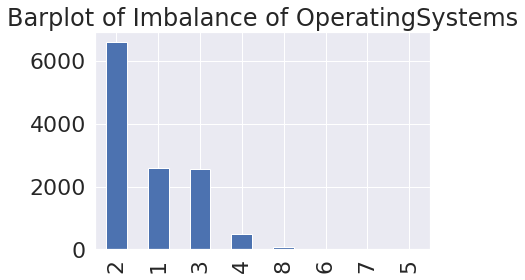

In [ ]:
df['OperatingSystems'].value_counts().plot(kind='bar', title= 'Barplot of Imbalance of OperatingSystems')

As shown by the barcharts above, the data is pretty imbalanced. Thus, data balancing method may need to be considered to balance the data.

## Exercise

You can now practice the above steps by usign the Abalone Data Set available from https://archive.ics.uci.edu/ml/datasets/Abalone